<a href="https://colab.research.google.com/github/Varshi45/CODEWAY/blob/main/Spam_Ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and Downloads**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Loading Data and Details**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/spam.csv",encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Encoding Column**

In [ ]:
encoder= le()
df['v1']=encoder.fit_transform(df['v1'])

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.nunique()

v1       2
v2    5169
dtype: int64

In [ ]:
df['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

**Visualizing using Pie Chart**

([<matplotlib.patches.Wedge at 0x7d88382af4c0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

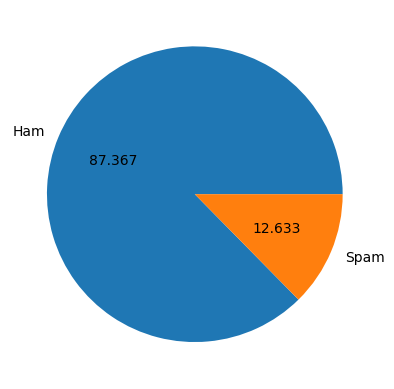

In [ ]:
plt.pie(df['v1'].value_counts(), labels=["Ham", "Spam"],autopct="%0.3f")

# **Data Processing and Cleaning**

In [ ]:
def transform_text(text):
      text=text.lower()
      text=nltk.word_tokenize(text)
      y=[]
      for i in text:
        if i.isalnum():
          y.append(i)

      text=y[:]
      y.clear()
      for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)
      text=y[:]
      y.clear()
      for i in text:
        y.append(ps.stem(i))
      return " ".join(y)

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

**Tokenization**

In [ ]:
#sample tokenization
ps=PorterStemmer()
transform_text("The quick brown fox jumps over the lazy dog. Suddenly, a squirrel dashes past them, causing chaos in the serene park. The birds scatter, and the fox gives chase, while the dog simply watches with amusement.")

'quick brown fox jump lazi dog suddenli squirrel dash past caus chao seren park bird scatter fox give chase dog simpli watch amus'

In [ ]:
df['trans_text']=df['v2'].apply(transform_text)
df.head()

,v1,v2,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


**Word Clouds for Spam and Ham**

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

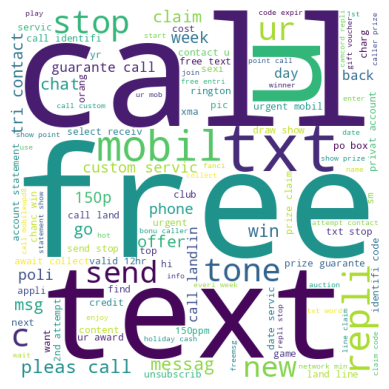

In [ ]:
spam_wc = wc.generate(df[df['v1'] == 1]['trans_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

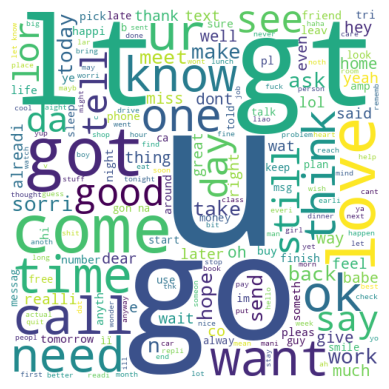

In [ ]:
ham_wc = wc.generate(df[df['v1'] == 0]['trans_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

In [ ]:
spam_corpus=[]
for msg in df[df['v1']==1]['trans_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

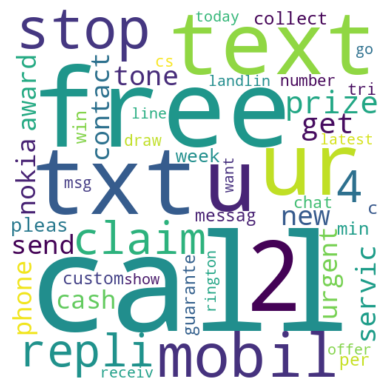

In [ ]:
word_counts = Counter(spam_corpus)
most_common_words = dict(word_counts.most_common(50))
wordcloud = wc.generate_from_frequencies(most_common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Training Model**

In [ ]:
cv=CountVectorizer()

In [ ]:
x=cv.fit_transform(df['trans_text']).toarray()
x.shape

(5169, 6708)

In [ ]:
y=df['v1'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

**Acurracy and Precision Scores**

In [ ]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# **Confusion-Matrix**

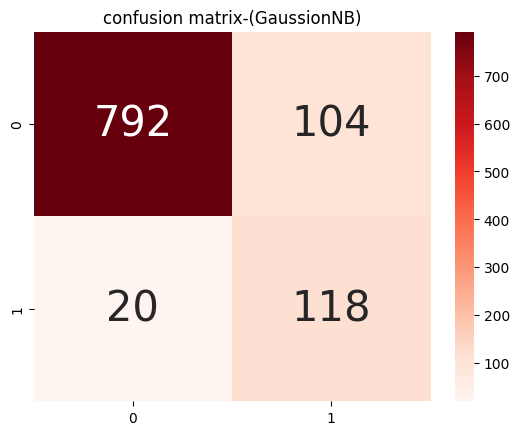

In [ ]:
ax=plt.axes()
con_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat, annot=True,annot_kws={"size":30},fmt='d', cmap="Reds",ax=ax)
ax.set_title('confusion matrix-(GaussionNB)')
plt.show()

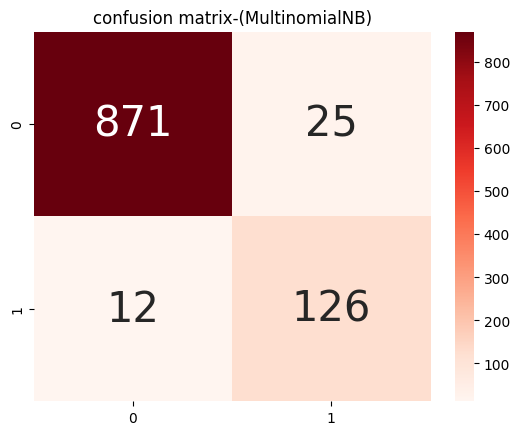

In [ ]:
ax=plt.axes()
con_mat=confusion_matrix(y_test,y_pred1)
sns.heatmap(con_mat, annot=True,annot_kws={"size":30},fmt='d', cmap="Reds",ax=ax)
ax.set_title('confusion matrix-(MultinomialNB)')
plt.show()

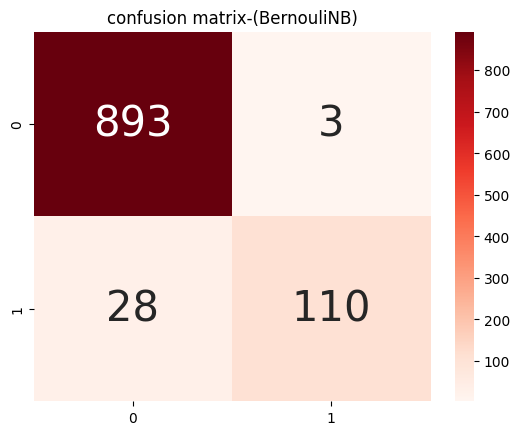

In [ ]:
ax=plt.axes()
con_mat=confusion_matrix(y_test,y_pred2)
sns.heatmap(con_mat, annot=True,annot_kws={"size":30},fmt='d', cmap="Reds",ax=ax)
ax.set_title('confusion matrix-(BernouliNB)')
plt.show()